In [1]:
import pandas as pd
from pathlib import Path

output_dirs = ['/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f1', \
               '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f2', \
               '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f3']

files = []
for d in output_dirs:
    files.extend(Path(d).glob('*/*.csv'))

scores_all = []

for f in files:
    df = pd.read_csv(f)
    df['dir'] = str(Path(f).parent)
    scores_all.append(df)

scores_all = pd.concat(scores_all)


In [2]:
df = scores_all.copy()
print(df['dir'].unique())
print(df['fset'].unique())
print(df['cv'].unique())
print('repeats: ' + str(df['repeat'].max()))
df.head()

['/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f1/202204221637'
 '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f1/202204251132'
 '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f1/202204261147'
 '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f2/202204251134'
 '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f2/202204211541'
 '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f3/202204221633']
['f_mot' 'f_mot_morph' 'f_mot_morph_dyn']
['StratifiedGroupKFold(n_splits=4, random_state=None, shuffle=True)']
repeats: 20


,accuracy,precision,recall,f1,classifier,kernel_size,epochs,repeat,cv,fset,dir
0,0.478261,0.461538,0.352941,0.400000,InceptionTime,20,10,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,/proj/hajaalin/Projects/n_track_ML/output/cros...
1,0.506667,0.521739,0.315789,0.393443,InceptionTime,20,10,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,/proj/hajaalin/Projects/n_track_ML/output/cros...
2,0.521739,0.600000,0.250000,0.352941,InceptionTime,20,10,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,/proj/hajaalin/Projects/n_track_ML/output/cros...
3,0.539474,0.666667,0.444444,0.533333,InceptionTime,20,10,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,/proj/hajaalin/Projects/n_track_ML/output/cros...
4,0.549296,0.555556,0.897436,0.686275,InceptionTime,20,10,2,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,/proj/hajaalin/Projects/n_track_ML/output/cros...


In [3]:
#df.groupby('epochs')['accuracy'].mean()
grp = df.groupby(['fset','epochs'])['accuracy'].agg(['mean','std']).reset_index()
grp.head()

,fset,epochs,mean,std
0,f_mot,10,0.516647,0.055945
1,f_mot,20,0.506764,0.060415
2,f_mot,30,0.514310,0.072176
3,f_mot,40,0.516203,0.058688
4,f_mot,50,0.513386,0.059481


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-0yzgvh_u because the default path (/home/hajaalin/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


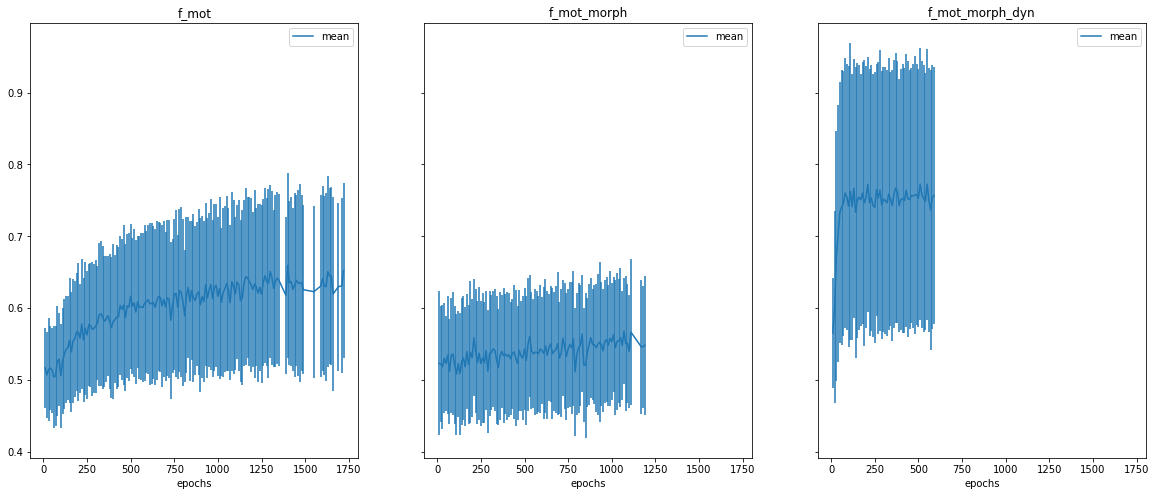

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,3, sharex=True, sharey=True)
fig.set_size_inches(20,8)
i=0
for fset in grp['fset'].unique():
    #print(fset)

    grp[grp['fset']==fset].plot('epochs', yerr='std', label='mean', title=fset, ax=axs[i])
    i = i+1
    

In [5]:
grp[grp['fset']=='f_mot'].tail()

,fset,epochs,mean,std
114,f_mot,1150,0.634846,0.116238
115,f_mot,1160,0.643661,0.123652
116,f_mot,1170,0.641960,0.112093
117,f_mot,1180,0.637386,0.117813
118,f_mot,1190,0.632304,0.121111


In [6]:
grp[grp['fset']=='f_mot_morph_dyn'].tail()

,fset,epochs,mean,std
287,f_mot_morph_dyn,550,0.772559,0.188804
288,f_mot_morph_dyn,560,0.750491,0.183274
289,f_mot_morph_dyn,570,0.736655,0.194573
290,f_mot_morph_dyn,580,0.754422,0.183710
291,f_mot_morph_dyn,590,0.756710,0.178427
